In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

<img src='./images/previous_vector_notation.png' width='800'>

<a name="toc_15456_2"></a>
# 2 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below. 

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

We will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

In [30]:
class GradientDescentMultipleLR():

    def __init__(self, X, y, lr=0.1):
        self.X = X
        self.y = y
        self.lr = lr

    
    def f(self, x, w, b):
        return np.dot(x, w) + b
    

    def compute_model_output(self, w, b):
        m = self.X.shape[0]
        outputs = np.zeros(m)

        for i in range(m):
            outputs[i] = self.f(self.X[i], w, b)
        
        return outputs

    
    def cost(self, w, b):
        m = self.X.shape[0]
        cost_sum = np.sum((self.compute_model_output(w, b) - self.y)**2)
        cost = cost_sum / (2*m)
        return cost
    

    def compute_gradient(self, w, b):
        m = self.X.shape[0]
        err = self.compute_model_output(w, b) - self.y
        dj_db = np.sum(err) / m
        dj_dwi = np.zeros(len(w))

        for i in range(len(w)):
            dj_dwi[i] = np.sum(err * self.X[:, i]) / m

        w = w - self.lr * dj_dwi
        b = b - self.lr * dj_db
        return w, b


    def run(self, w, b, iter):
        costs = np.zeros(iter)
        print(f'Initial Cost = {self.cost(w, b)}')

        for i in range(iter):
            w, b = self.compute_gradient(w, b)
            costs[i] = self.cost(w, b)
            print(f'Current Cost = {costs[i]}')

        return w, b, costs

In [32]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
# b_init = 785.1811367994083
# w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

w_init = np.zeros_like(w_init)
b_init = 0.
iter = 1000
# X_train = np.array([[1, 2], [1, 1]])
# y_train = np.array([2, 4])
# w_init = np.array([1, 2])
# b_init = 1

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

gd = GradientDescentMultipleLR(X_train, y_train, lr=5.0e-7)
w, b, costs = gd.run(w_init, b_init, iter)

w_init shape: (4,), b_init type: <class 'float'>
Initial Cost = 49518.0
Current Cost = 2529.4629522316304
Current Cost = 765.8336829952988
Current Cost = 699.6290280210446
Current Cost = 697.1337425623095
Current Cost = 697.0296591788104
Current Cost = 697.0153256006653
Current Cost = 697.0043615139087
Current Cost = 696.9935248096691
Current Cost = 696.9826938019223
Current Cost = 696.9718639233548
Current Cost = 696.9610350024587
Current Cost = 696.9502070327148
Current Cost = 696.939380013799
Current Cost = 696.9285539456151
Current Cost = 696.9177288280792
Current Cost = 696.9069046611058
Current Cost = 696.8960814446137
Current Cost = 696.8852591785139
Current Cost = 696.8744378627272
Current Cost = 696.8636174971624
Current Cost = 696.852798081742
Current Cost = 696.8419796163756
Current Cost = 696.8311621009815
Current Cost = 696.8203455354765
Current Cost = 696.8095299197731
Current Cost = 696.7987152537909
Current Cost = 696.7879015374392
Current Cost = 696.7770887706384
Curre

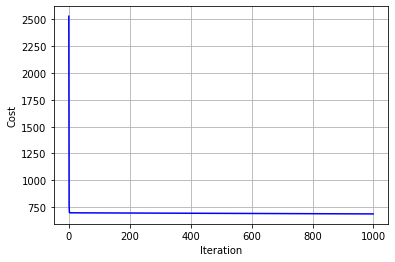

In [39]:
plt.plot(np.arange(iter), costs, c='b')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

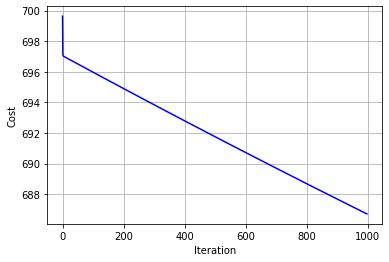

In [40]:
plt.plot(np.arange(len(costs[2:])), costs[2:], c='b')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()


In [27]:
# Now that we have our model estimation, let us use it predict the price of house with following values:

inputs = np.array([1200, 3, 1, 40])
gd.f(inputs, w, b)

242.12213225086757